In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [5]:
data = pd.read_csv(
    "data/Big9Returns2017.csv",
    parse_dates=["Date"]
)

data.sort_values(by="Date", inplace=True)
data.set_index("Date", inplace=True)
data.head()

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
Date,,,,,,,,,
2017-01-03,0.002849,0.007081,0.006980,0.005468,0.010894,0.005068,0.002848,0.015732,0.011521
2017-01-04,-0.001119,-0.004474,-0.011002,-0.001640,0.001844,0.004657,0.000316,0.015660,-0.005811
2017-01-05,0.005085,0.000000,-0.014907,0.010463,-0.009205,0.030732,-0.005678,0.016682,-0.002806
2017-01-06,0.011148,0.008668,-0.000565,-0.004792,0.000116,0.019912,0.002855,0.022707,-0.019924
2017-01-09,0.009159,-0.003183,-0.016497,-0.000172,0.000697,0.001168,-0.004745,0.012074,-0.012585


# Portfolio composition and backtesting


In [9]:
# Finish defining the portfolio weights as a numpy array
portfolio_weights = np.array([0.12, 0.15, 0.08, 0.05, 0.09, 0.10, 0.11, 0.14, 0.16])

# Calculate the weighted stock returns
weighted_returns = data.mul(portfolio_weights, axis=1)

weighted_returns.head(3)

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
Date,,,,,,,,,
2017-01-03,0.000342,0.001062,0.000558,0.000273,0.000980,0.000507,0.000313,0.002203,0.001843
2017-01-04,-0.000134,-0.000671,-0.000880,-0.000082,0.000166,0.000466,0.000035,0.002192,-0.000930
2017-01-05,0.000610,0.000000,-0.001193,0.000523,-0.000828,0.003073,-0.000625,0.002335,-0.000449


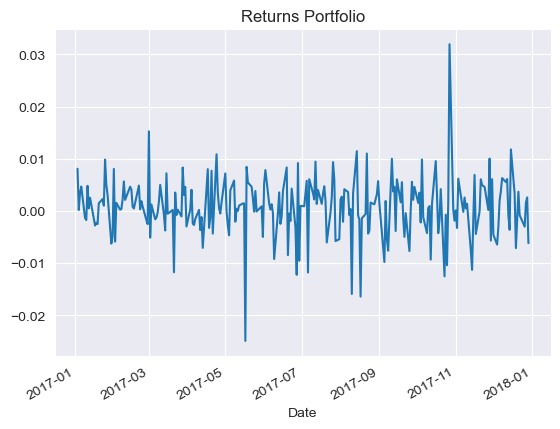

In [13]:
data["portfolio"] = weighted_returns.sum(axis=1)
data["portfolio"].plot()
plt.title("Returns Portfolio");

In [18]:
cumulative_returns = data["portfolio"].add(1).cumprod().subtract(1)

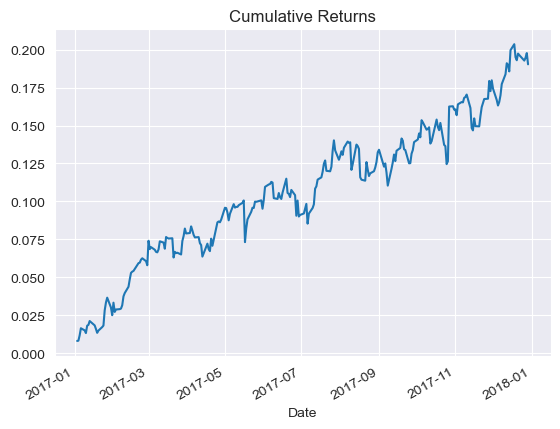

In [20]:
cumulative_returns.plot()
plt.title("Cumulative Portfolio Returns");

In [22]:
num_stocks = 9
equal_stock_value = 1 / num_stocks

equal_weights = np.repeat(equal_stock_value, num_stocks)
equal_weights

array([0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111])

In [23]:
data["portfolio_ew"] = data.iloc[:, :num_stocks].mul(
    equal_weights, 
    axis=1
).sum(axis=1)

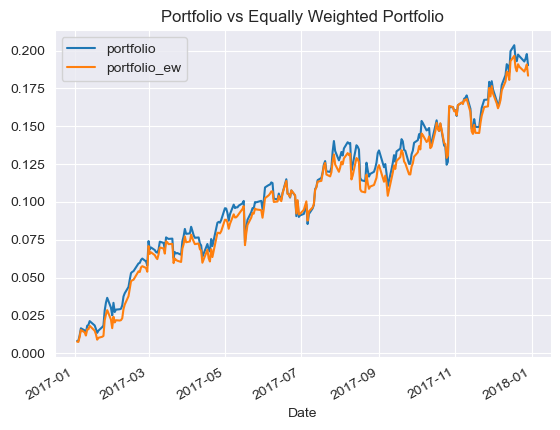

In [27]:
data[["portfolio", "portfolio_ew"]].add(1).cumprod().subtract(1).plot()
plt.title("Portfolio vs Equally Weighted Portfolio");

In [28]:
# Create an array of market capitalizations (in billions)
market_capitalizations = np.array(
    [601.51, 469.25, 349.5, 310.48, 299.77, 356.94, 268.88, 331.57, 246.09]
)
mcap_weights = (market_capitalizations / sum(market_capitalizations))
mcap_weights

array([0.18599625, 0.1450994 , 0.10807084, 0.09600524, 0.09269355,
       0.1103714 , 0.08314188, 0.1025266 , 0.07609485])

In [29]:
data["portfolio_mcap"] = data.iloc[:, :num_stocks].mul(
    mcap_weights,
    axis=1
).sum(axis=1)

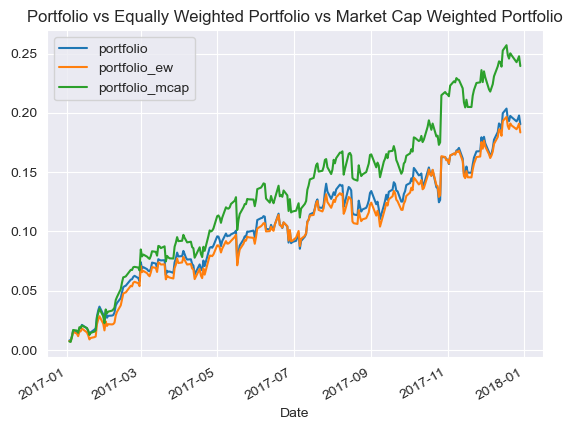

In [63]:
data[["portfolio", "portfolio_ew", "portfolio_mcap"]].add(1).cumprod().subtract(1).plot()
plt.title("Portfolio vs Equally Weighted Portfolio vs Market Cap Weighted Portfolio");

# Correlation and co-variance


In [34]:
correlation_matrix = data.iloc[:, :num_stocks].corr()
correlation_matrix.head(3)

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
AAPL,1.000000,0.437430,0.055505,0.038432,0.199914,0.509472,0.006766,0.542367,0.005082
MSFT,0.437430,1.000000,0.084108,0.230215,0.191248,0.621096,-0.044827,0.543341,-0.021079
XOM,0.055505,0.084108,1.000000,0.121012,0.305926,0.015118,0.193861,-0.046813,0.197576


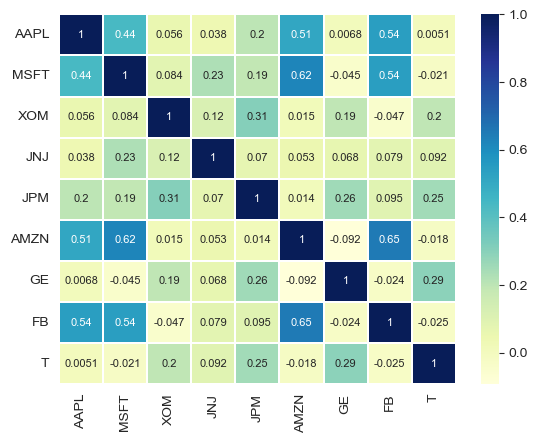

In [35]:
# Create a heatmap
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="YlGnBu", 
            linewidths=0.3,
            annot_kws={"size": 8})

# Plot aesthetics
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

In [36]:
# Calculate the covariance matrix
cov_mat = data.iloc[:, :num_stocks].cov()

# Annualize the co-variance matrix
cov_mat_annual = cov_mat * 252

# Print the annualized co-variance matrix
print(cov_mat_annual)

          AAPL      MSFT       XOM       JNJ       JPM      AMZN        GE  \
AAPL  0.030996  0.011400  0.001093  0.000774  0.005716  0.018805  0.000236   
MSFT  0.011400  0.021912  0.001392  0.003899  0.004597  0.019275 -0.001315   
XOM   0.001093  0.001392  0.012500  0.001548  0.005554  0.000354  0.004295   
JNJ   0.000774  0.003899  0.001548  0.013092  0.001307  0.001266  0.001540   
JPM   0.005716  0.004597  0.005554  0.001307  0.026371  0.000474  0.008283   
AMZN  0.018805  0.019275  0.000354  0.001266  0.000474  0.043954 -0.003830   
GE    0.000236 -0.001315  0.004295  0.001540  0.008283 -0.003830  0.039270   
FB    0.016243  0.013682 -0.000890  0.001545  0.002631  0.023290 -0.000821   
T     0.000152 -0.000530  0.003751  0.001780  0.006972 -0.000638  0.009849   

            FB         T  
AAPL  0.016243  0.000152  
MSFT  0.013682 -0.000530  
XOM  -0.000890  0.003751  
JNJ   0.001545  0.001780  
JPM   0.002631  0.006972  
AMZN  0.023290 -0.000638  
GE   -0.000821  0.009849  
FB 

In [37]:
# Calculate the portfolio standard deviation
portfolio_volatility = np.sqrt(np.dot(portfolio_weights.T, np.dot(cov_mat_annual, portfolio_weights)))
print(portfolio_volatility)

0.08931417642713795


# Markowitz portfolios


In [50]:
random_portfolios = pd.read_csv(
    "data/EfficientFrontierPortfoliosSlim.csv",
)
random_portfolios.head(2)

,AAPL weight,MSFT weight,XOM weight,JNJ weight,JPM weight,AMZN weight,GE weight,FB weight,T weight,Returns,Volatility
0,0.000053,0.263110,0.007022,0.040087,0.000027,0.024316,0.355899,0.299400,0.010087,0.127453,0.171565
1,0.042360,0.034922,0.079355,0.043057,0.001435,0.202032,0.225924,0.362324,0.008590,0.138614,0.182723


In [51]:
random_portfolios.shape

(39, 11)

In [55]:
risk_free_rate = 0
random_portfolios["sharpe"] = random_portfolios["Returns"].subtract(
    risk_free_rate
).divide(random_portfolios["Volatility"])

In [57]:
# Print the range of Sharpe ratios
print(random_portfolios['sharpe'].describe()[['min', 'max']])

min    0.742884
max    2.270462
Name: sharpe, dtype: float64


In [61]:
# Sort the portfolios by Sharpe ratio
sorted_portfolios = random_portfolios.sort_values(by=['sharpe'], ascending=False)

# Extract the corresponding weights
msr_weights = sorted_portfolios.iloc[0, 0:num_stocks]

# Cast the MSR weights as a numpy array
msr_weights_array = np.array(msr_weights)


In [62]:
# Calculate the MSR (maximum Sharpe ratio) portfolio returns
data['portfolio_msr'] = data.iloc[:, 0:num_stocks].mul(
    msr_weights_array, axis=1).sum(axis=1)


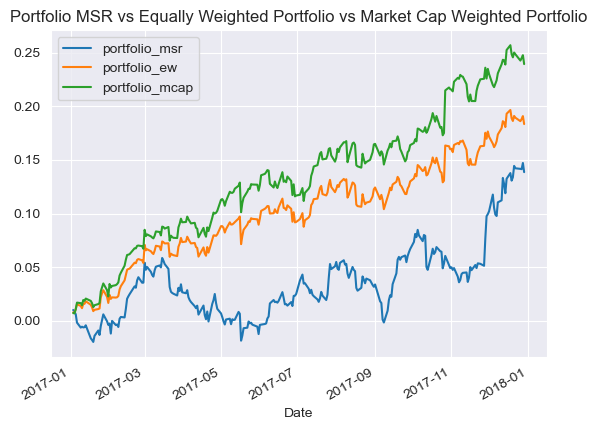

In [64]:
data[["portfolio_msr", "portfolio_ew", "portfolio_mcap"]].add(1).cumprod().subtract(1).plot()
plt.title("Portfolio MSR vs Equally Weighted Portfolio vs Market Cap Weighted Portfolio");

In [66]:
# global minimum volatility portfolio
# Sort the portfolios by volatility
sorted_portfolios = random_portfolios.sort_values(by=['Volatility'], ascending=True)

# Extract the corresponding weights
gmv_weights = sorted_portfolios.iloc[0, 0:num_stocks]

# Cast the GMV weights as a numpy array
gmv_weights_array = np.array(gmv_weights)

# Calculate the GMV portfolio returns
data['portfolio_gmv'] = data.iloc[:, 0:num_stocks].mul(gmv_weights_array, axis=1).sum(axis=1)


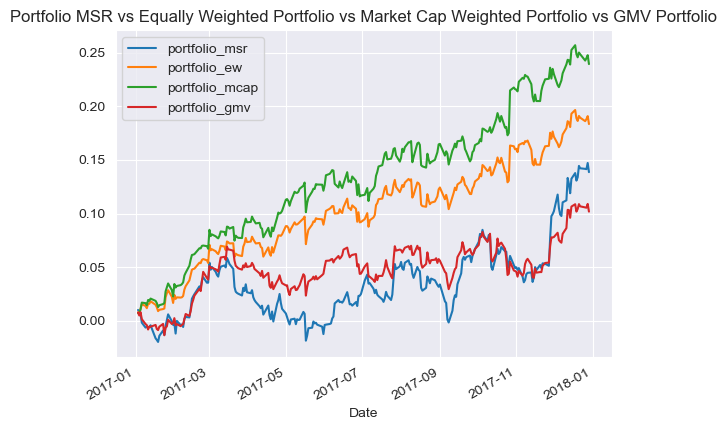

In [68]:
data[["portfolio_msr", "portfolio_ew", "portfolio_mcap", "portfolio_gmv"]].add(1).cumprod().subtract(1).plot()
plt.title("Portfolio MSR vs Equally Weighted Portfolio vs Market Cap Weighted Portfolio vs GMV Portfolio");